# Parallel Satellite Image Segementation

ESA satellite called Sentinel2 that takes pictures of Earth. We are using these images to study sea ice. 

In this study, one task is to identify the sea ice from the picture. We used color segmentation for this task.

# Sentinel 2 Satellite Image

In [2]:
import cv2 # import after setting OPENCV_IO_MAX_IMAGE_PIXELS
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import hsv_to_rgb
import os
import multiprocessing as mp
import time

## Segment the ICE and Water

Since ice is mostly white, we will isolate the white pixels

In [3]:
def color_segmentation(img):
    lower_ice = (0, 0, 205)#(127, 7, 94) #increase v to specify ow
    upper_ice = (185, 255, 255)#(147, 53, 232) #increase h to specify si

    lower_tice = (0, 0, 31)#(127, 7, 94) #increase v to specify ow
    upper_tice = (185, 255, 204)#(147, 53, 232) #increase h to specify si

    lower_water = (0, 0, 0)#(127, 7, 94) #increase v to specify ow
    upper_water = (185, 255, 30)#(147, 53, 232) #increase h to specify si
    # Get a "mask" over the image for each pixel
    # if a pixel's color is between the lower and upper white, its mask is 1
    # Otherwise, the pixel's mask is 0
    hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    mask_ice = cv2.inRange(hsv_img, lower_ice, upper_ice)
    mask_tice = cv2.inRange(hsv_img, lower_tice, upper_tice)
    mask_water = cv2.inRange(hsv_img, lower_water, upper_water)

    # duplicate the image
    seg_img = img.copy()

    #color each masked portion
    seg_img[mask_ice == 255] = [255, 0, 0]
    seg_img[mask_tice == 255] = [0, 0, 255]
    seg_img[mask_water == 255] = [0, 255, 0]

    # plot the original image and red-painted image
    #plt.rcParams['figure.figsize'] = [20, 20]
    #plt.subplot(1, 2, 1)
    #plt.imshow(img)
    #plt.subplot(1, 2, 2)
    #plt.imshow(seg_img)
    
    return seg_img

#save image
# Using cv2.imwrite() method
# Saving the image
#img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
#cv2.imwrite('s2_seg_59.png', img5)


# Image read

65
65


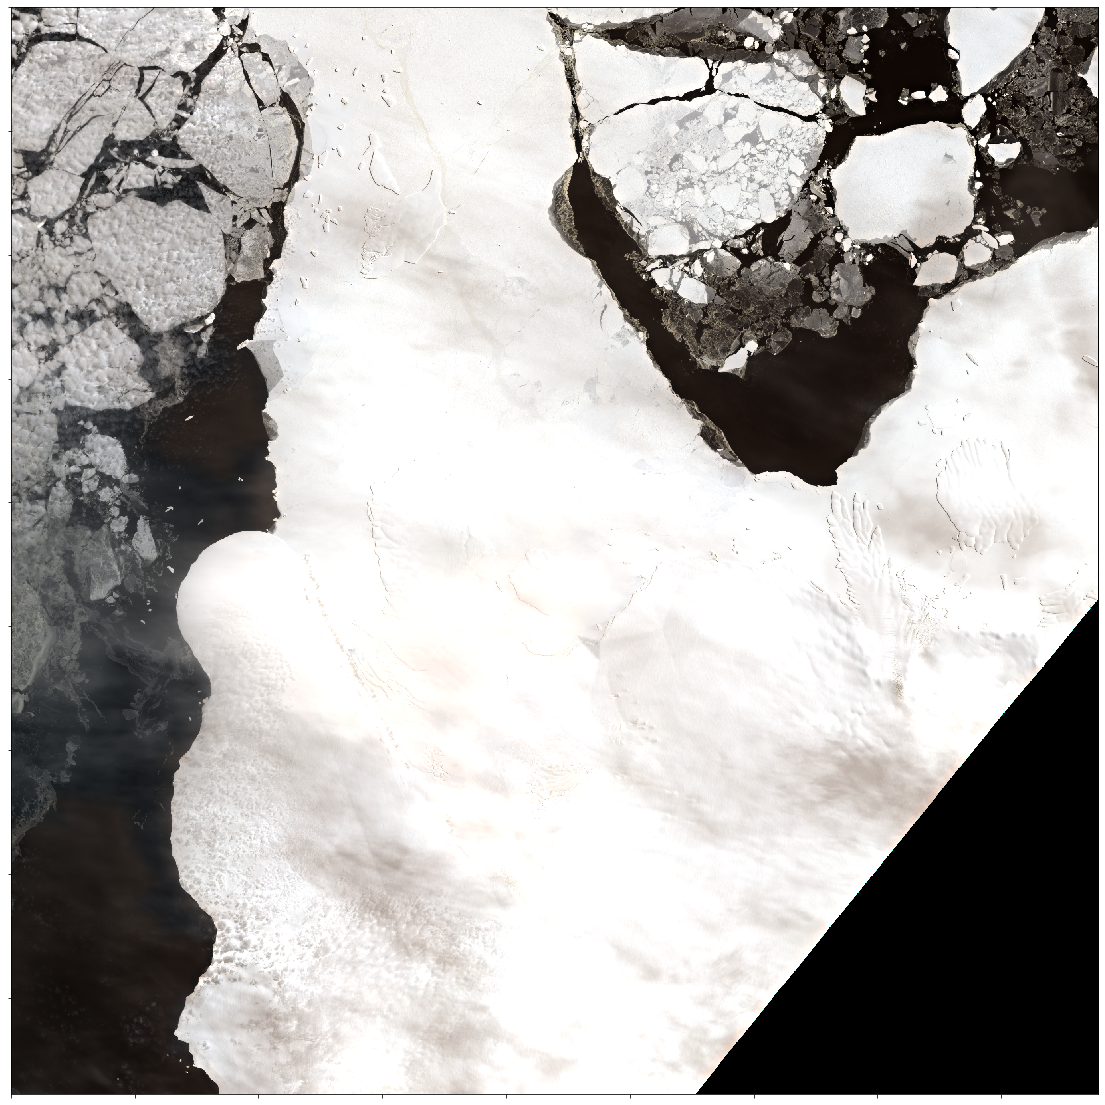

In [9]:
full_images = []
full_labels = []

#im = cv2.imread("iqra_data/image/s2_vis_35_1000_500.png")
#print(im.shape)
# Load in the images
root_image = "s2_images_png/"
#root_label = "s2_seg_images_split/"
for filepath in os.listdir(root_image):
    im = cv2.imread(root_image + filepath)
    sm = color_segmentation(im)
    full_images.append(im)
    full_labels.append(sm)

print(len(full_images))
print(len(full_labels))

plt.rcParams['figure.figsize'] = [20, 20]
#plt.subplot(1, 2, 1)
plt.imshow(full_images[5])

In [5]:
mp.cpu_count()

8

In [6]:
pc = len(full_images)/mp.cpu_count()
mod = len(full_images)%mp.cpu_count()
print(pc)
print(mod)

8.125
1


In [8]:
import random

def rand_num():
    print(os.getpid())
    num = random.random()
    print(num)
    
def par_seg(full_images, full_labels):
    print(os.getpid())
    print("before loop")
    for i in full_images: #range(idx1,idx2):
        #print(i)
        lower_ice = (0, 0, 205)#(127, 7, 94) #increase v to specify ow
        upper_ice = (185, 255, 255)#(147, 53, 232) #increase h to specify si

        lower_tice = (0, 0, 31)#(127, 7, 94) #increase v to specify ow
        upper_tice = (185, 255, 204)#(147, 53, 232) #increase h to specify si

        lower_water = (0, 0, 0)#(127, 7, 94) #increase v to specify ow
        upper_water = (185, 255, 30)#(147, 53, 232) #increase h to specify si
        # Get a "mask" over the image for each pixel
        # if a pixel's color is between the lower and upper white, its mask is 1
        # Otherwise, the pixel's mask is 0
        print("before cv")
        hsv_img = cv2.cvtColor(i, cv2.COLOR_RGB2HSV)

        mask_ice = cv2.inRange(hsv_img, lower_ice, upper_ice)
        mask_tice = cv2.inRange(hsv_img, lower_tice, upper_tice)
        mask_water = cv2.inRange(hsv_img, lower_water, upper_water)
        
        print("after masking")
        # duplicate the image
        seg_img = i.copy()

        #color each masked portion
        seg_img[mask_ice == 255] = [255, 0, 0]
        seg_img[mask_tice == 255] = [0, 0, 255]
        seg_img[mask_water == 255] = [0, 255, 0]
        print("before append")
        #print(len(seg_img))
        full_labels.append(seg_img)
    print("Loop finished")
    print("----- end -----")

full_labels = mp.Manager().list()
#processes = [mp.Process(target=rand_num, args=()) for x in range(int(pc))]
#for p in processes:
#    p.start()
#for p in processes:
#    p.join()


p1 = mp.Process(target=par_seg, args=(full_images, full_labels))#, 0, 8))
p2 = mp.Process(target=par_seg, args=(full_images, full_labels))#, 8, 16))
p3 = mp.Process(target=par_seg, args=(full_images, full_labels))#, 16, 24))
p4 = mp.Process(target=par_seg, args=(full_images, full_labels))#, 24, 32))
p5 = mp.Process(target=par_seg, args=(full_images, full_labels))#, 32, 40))
p6 = mp.Process(target=par_seg, args=(full_images, full_labels))#, 40, 48))
p7 = mp.Process(target=par_seg, args=(full_images, full_labels))#, 48, 56))
p8 = mp.Process(target=par_seg, args=(full_images, full_labels))#, 56, 65))

p1.start()
p2.start()
p3.start()
p4.start()
p5.start()
p6.start()
p7.start()
p8.start()

p1.join()
p2.join()
p3.join()
p4.join()
p5.join()
p6.join()
p7.join()
p8.join()




56798
before loop
before cv
56799
before cv
before loop
56800
before loop
before cv
56801
before loop
before cv
56802
before loop
before cv
56803
before loop
before cv
56804
before loop
before cv


In [ ]:

Modin

Dask

65
file name partition
mp run 
open file
then cv
1,2,4
multiprocessor, flie based,..


In [16]:
len(full_labels)

0

In [10]:
def my_func(x):
    print(mp.current_process())
    return x**x

def main():
    pool = mp.Pool(mp.cpu_count())
    result = pool.map(my_func, [4,2,3,5,3,2,1,2])
    result_set_2 = pool.map(my_func, [4,6,5,4,6,3,23,4,6])

    print(result)
    print(result_set_2)

if __name__ == "__main__":
    main()

<ForkProcess(ForkPoolWorker-10, started daemon)>
<ForkProcess(ForkPoolWorker-9, started daemon)>
<ForkProcess(ForkPoolWorker-11, started daemon)>
<ForkProcess(ForkPoolWorker-12, started daemon)>
<ForkProcess(ForkPoolWorker-13, started daemon)>
<ForkProcess(ForkPoolWorker-15, started daemon)>
<ForkProcess(ForkPoolWorker-14, started daemon)>
<ForkProcess(ForkPoolWorker-16, started daemon)>
<ForkProcess(ForkPoolWorker-10, started daemon)>
<ForkProcess(ForkPoolWorker-11, started daemon)>
<ForkProcess(ForkPoolWorker-9, started daemon)>
<ForkProcess(ForkPoolWorker-12, started daemon)>
<ForkProcess(ForkPoolWorker-16, started daemon)>
[256, 4, 27, 3125, 27, 4, 1, 4]
[256, 46656, 3125, 256, 46656, 27, 20880467999847912034355032910567, 256, 46656]
<ForkProcess(ForkPoolWorker-13, started daemon)>
<ForkProcess(ForkPoolWorker-15, started daemon)>
<ForkProcess(ForkPoolWorker-14, started daemon)>
<ForkProcess(ForkPoolWorker-10, started daemon)>


# Split image read

484
0


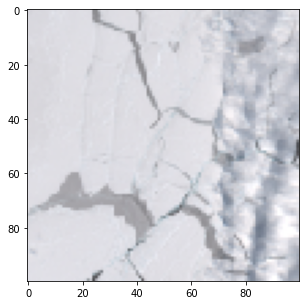

<class 'numpy.ndarray'>


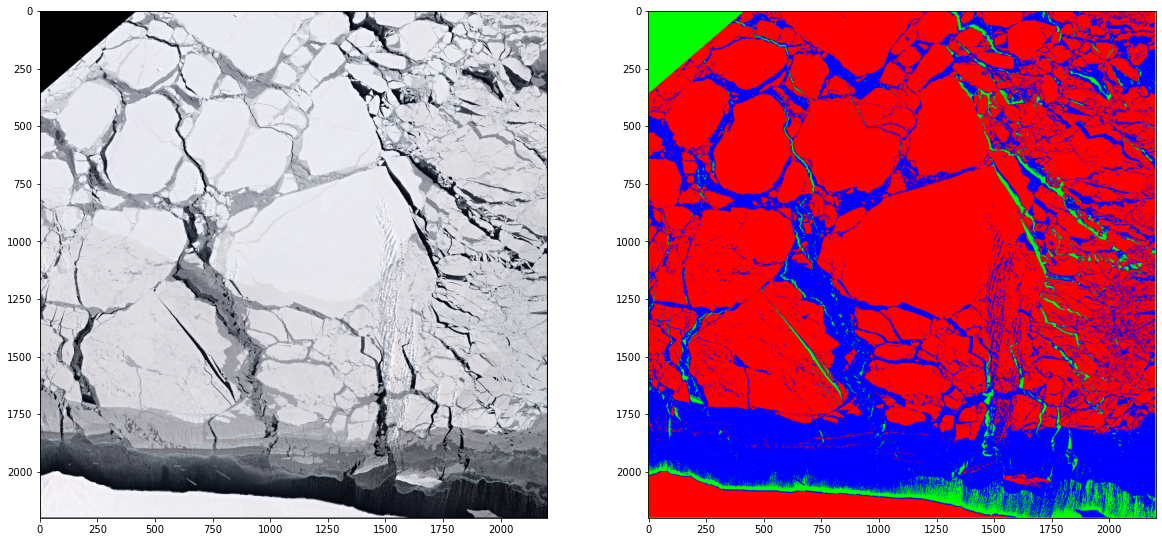

In [39]:
#0, 1, 2, 27, 29, 31, 35, 59
#img = cv2.imread("s2_vis_0.png")
#img = cv2.imread("s2_vis_27.png")
#img = cv2.imread("s2_vis_29.png")
img = cv2.imread("s2_vis_31.png")
#img = cv2.imread("s2_vis_35.png")
#img = cv2.imread("s2_vis_59.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# for original and labeled split image list
images = []
labels = [] 

#split image 100x100
for r in range(0,img.shape[0],100):
    for c in range(0,img.shape[1],100):
        tmp_im = img[r:r+100, c:c+100,:]
        if tmp_im.shape == (100, 100, 3):
            images.append(tmp_im)
        else:
            pass

print(len(images))
print(len(labels))

plt.rcParams['figure.figsize'] = [5, 5]
imgplot = plt.imshow(images[300])
plt.show()

print(type(images[0]))

# Bash level Par

In [1]:
import cv2 # import after setting OPENCV_IO_MAX_IMAGE_PIXELS
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import hsv_to_rgb
import os
import multiprocessing as mp
import time

def color_segmentation(img):
    lower_ice = (0, 0, 205)#(127, 7, 94) #increase v to specify ow
    upper_ice = (185, 255, 255)#(147, 53, 232) #increase h to specify si

    lower_tice = (0, 0, 31)#(127, 7, 94) #increase v to specify ow
    upper_tice = (185, 255, 204)#(147, 53, 232) #increase h to specify si

    lower_water = (0, 0, 0)#(127, 7, 94) #increase v to specify ow
    upper_water = (185, 255, 30)#(147, 53, 232) #increase h to specify si
    # Get a "mask" over the image for each pixel
    # if a pixel's color is between the lower and upper white, its mask is 1
    # Otherwise, the pixel's mask is 0
    hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    mask_ice = cv2.inRange(hsv_img, lower_ice, upper_ice)
    mask_tice = cv2.inRange(hsv_img, lower_tice, upper_tice)
    mask_water = cv2.inRange(hsv_img, lower_water, upper_water)

    # duplicate the image
    seg_img = img.copy()

    #color each masked portion
    seg_img[mask_ice == 255] = [255, 0, 0]
    seg_img[mask_tice == 255] = [0, 0, 255]
    seg_img[mask_water == 255] = [0, 255, 0]
    
    return seg_img


def my_func(x):
    print(mp.current_process())
    return x**x

def main():
    
    full_images = []
    full_labels = []

    t0 = time.time()

    # Load in the images
    root_image = "s2_images/"
    #root_label = "s2_seg_images_split/"
    for filepath in sorted(os.listdir(root_image)):
        im = cv2.imread(root_image + filepath)
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        #sm = color_segmentation(im)

        full_images.append(im)
        #full_labels.append(sm)


    t1 = time.time()

    total = t1-t0

    print(total)
    print(len(full_images))
    print(len(full_labels))

    #plot the original image and red-painted image
    #plt.rcParams['figure.figsize'] = [20, 20]
    #plt.subplot(1, 2, 1)
    #plt.imshow(full_images[5])
    #plt.subplot(1, 2, 2)
    #plt.imshow(full_labels[5])

    #Parallel portion
    #pool = mp.Pool(mp.cpu_count())
    #pool = mp.Pool(1)
    #result = pool.map(color_segmentation, full_images[1])
    #result_set_2 = pool.map(my_func, [4,6,5,4,6,3,23,4,6])

    #print(result)
    #print(result_set_2)

if __name__ == "__main__":
    main()


6.839659929275513
65
0


# OpenCV and MP

In [6]:
import cv2
import multiprocessing as mp
import numpy as np
import psutil
from ctypes import *

img = cv2.imread('s2_vis_0.png', cv2.IMREAD_ANYDEPTH) # here I'm using a indexed 16-bit tiff as an example.
num_processes = 4
kernel_size = 11
tile_size = img.shape[0]/num_processes  # Assuming img.shape[0] is divisible by 4 in this case

output = mp.Queue()
#result = mp.Array(ctypes.c_uint16, img.shape[0]*img.shape[1], lock = False)

def mp_filter(x, output):
    print(psutil.virtual_memory())  # monitor memory usage
    output.put(x, cv2.GaussianBlur(img[img.shape[0]/num_processes*x:img.shape[0]/num_processes*(x+1), :], 
               (kernel_size, kernel_size), kernel_size/5))
    # note that you actually have to process a slightly larger block and leave out the border.

if __name__ == 'main':
    processes = [mp.Process(target=mp_filter, args=(x, output)) for x in range(num_processes)]

    for p in processes:
        p.start()

    result = []
    for ii in range(num_processes):
        print("i am ", ii)
        result.append(output.get(True))

    for p in processes:
        p.join()